# Oakland Income Distribution by Household

## Importing needed libraries

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Adding files

I downloaded a dataset from census reporter that includes the number of households in different ranges of incomes throughout census tracts in Oakland. I may have to add more data to see if I can compare it, because this specific dataset doesn't show me average or median incomes of the individual tracts -- just the number of households in each income range in that tract.

In [3]:
income = gpd.read_file('oaklandincome.geojson')

In [4]:
income

geoid                            name  B19001001  \
0    14000US06001400100  Census Tract 4001, Alameda, CA     1293.0   
1    14000US06001400200  Census Tract 4002, Alameda, CA      847.0   
2    14000US06001400300  Census Tract 4003, Alameda, CA     2441.0   
3    14000US06001400400  Census Tract 4004, Alameda, CA     1802.0   
4    14000US06001400500  Census Tract 4005, Alameda, CA     1606.0   
..                  ...                             ...        ...   
110  14000US06001981900  Census Tract 9819, Alameda, CA       27.0   
111  14000US06001982000  Census Tract 9820, Alameda, CA       32.0   
112  14000US06001983200  Census Tract 9832, Alameda, CA      340.0   
113  14000US06001990000  Census Tract 9900, Alameda, CA        0.0   
114      16000US0653000                     Oakland, CA   162419.0   

     B19001001, Error  B19001002  B19001002, Error  B19001003  \
0                56.0       10.0              17.0        7.0   
1                51.0        5.0               7.0        5.0   
2               134.0      101.0              98.0       87.0   
3                97.0       48.0              33.0       48.0   
4                79.0      108.0              56.0       31.0   
..                ...        ...               ...        ...   
110              14.0        0.0              12.0        0.0   
111              11.0        0.0              12.0        0.0   
112              37.0        4.0               6.0        4.0   
113              12.0        0.0              12.0        0.0   
114            1356.0     9356.0             643.0    10163.0   

     B19001003, Error  B19001004  B19001004, Error  ...  B19001013, Error  \
0                11.0       43.0              41.0  ...              42.0   
1                 8.0        0.0              12.0  ...              38.0   
2                91.0       30.0              35.0  ...             110.0   
3                57.0       78.0              60.0  ...              78.0   
4                29.0       24.0              20.0  ...              77.0   
..                ...        ...               ...  ...               ...   
110              12.0        0.0              12.0  ...              12.0   
111              12.0        0.0              12.0  ...              12.0   
112               6.0        0.0              12.0  ...              20.0   
113              12.0        0.0              12.0  ...              12.0   
114             818.0     6478.0             587.0  ...             776.0   

     B19001014  B19001014, Error  B19001015  B19001015, Error  B19001016  \
0         68.0              36.0       64.0              43.0       96.0   
1        100.0              38.0       19.0              16.0      130.0   
2        133.0              72.0       78.0              49.0      373.0   
3        116.0              51.0      312.0             106.0      148.0   
4        149.0              72.0      222.0             107.0      236.0   
..         ...               ...        ...               ...        ...   
110        7.0              12.0        0.0              12.0        8.0   
111        4.0               6.0        6.0               5.0        4.0   
112       16.0              13.0       20.0              13.0       89.0   
113        0.0              12.0        0.0              12.0        0.0   
114    13770.0             770.0    10573.0             626.0    14237.0   

     B19001016, Error  B19001017  B19001017, Error  \
0                44.0      710.0              96.0   
1                44.0      390.0              56.0   
2               122.0      732.0             130.0   
3                57.0      506.0             119.0   
4                85.0      296.0              88.0   
..                ...        ...               ...   
110               8.0       12.0              10.0   
111               6.0        8.0               9.0   
112              29.0      129.0              35.0   
113              1

All I've done so far is display the beginning and ending parts of my dataset, and I have 115 rows and 3 columns. It's a lot to take in so I would like to gather more information on the data.

In [5]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             115 non-null    object  
 1   name              115 non-null    object  
 2   B19001001         115 non-null    float64 
 3   B19001001, Error  115 non-null    float64 
 4   B19001002         115 non-null    float64 
 5   B19001002, Error  115 non-null    float64 
 6   B19001003         115 non-null    float64 
 7   B19001003, Error  115 non-null    float64 
 8   B19001004         115 non-null    float64 
 9   B19001004, Error  115 non-null    float64 
 10  B19001005         115 non-null    float64 
 11  B19001005, Error  115 non-null    float64 
 12  B19001006         115 non-null    float64 
 13  B19001006, Error  115 non-null    float64 
 14  B19001007         115 non-null    float64 
 15  B19001007, Error  115 non-null    float64 
 16  B19001008         

I see that I have 37 columns, like the command before told me, but I definitely want to get rid of the error columns because they won't help organize my data.
First, I will convert the columns into a list and then redefine my data without the error columns.

In [6]:
list(income)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

In [7]:
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [8]:
income = income[columns_to_keep]

Now I will list it out again to make sure it's worked:

In [9]:
list(income)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

These column names make no sense to me, so I am going to rename them all based on the metadata that I extracted when I downloaded the dataset from censusreporter.

In [10]:
income.columns = ['geoid',
 'name',
 'Total Households',
 'Less than 10,000',
 '10,000 to 14,999',
 '15,000 to 19,999',
 '20,000 to 24,999',
 '25,000 to 29,999',
 '30,000 to 34,999',
 '35,000 to 39,999',
 '40,000 to 44,999',
 '45,000 to 49,999',
 '50,000 to 59,999',
 '60,000 to 74,999',
 '75,000 to 99,999',
 '100,000 to 124,999',
 '125,000 to 149,999',
 '150,000 to 199,999',
 '200,000 or more',
 'geometry']

Now I'll check my table again and see how it has turned out

In [11]:
income.head()

geoid                            name  Total Households  \
0  14000US06001400100  Census Tract 4001, Alameda, CA            1293.0   
1  14000US06001400200  Census Tract 4002, Alameda, CA             847.0   
2  14000US06001400300  Census Tract 4003, Alameda, CA            2441.0   
3  14000US06001400400  Census Tract 4004, Alameda, CA            1802.0   
4  14000US06001400500  Census Tract 4005, Alameda, CA            1606.0   

   Less than 10,000  10,000 to 14,999  15,000 to 19,999  20,000 to 24,999  \
0              10.0               7.0              43.0              22.0   
1               5.0               5.0               0.0               0.0   
2             101.0              87.0              30.0              77.0   
3              48.0              48.0              78.0              49.0   
4             108.0              31.0              24.0              46.0   

   25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  40,000 to 44,999  \
0              14.0              50.0               0.0               0.0   
1               0.0              13.0              21.0               6.0   
2              39.0             157.0               0.0              75.0   
3              40.0              48.0              42.0              22.0   
4              77.0              54.0              13.0              36.0   

   45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  75,000 to 99,999  \
0              26.0              55.0              25.0             103.0   
1              14.0              32.0              51.0              61.0   
2              94.0              13.0             155.0             297.0   
3              53.0              50.0              93.0             149.0   
4              59.0              50.0              32.0             173.0   

   100,000 to 124,999  125,000 to 149,999  150,000 to 199,999  \
0                68.0                64.0                96.0   
1               100.0                19.0               130.0   
2               133.0                78.0               373.0   
3               116.0               312.0               148.0   
4               149.0               222.0               236.0   

   200,000 or more                                           geometry  
0            710.0  MULTIPOLYGON (((-122.24692 37.88544, -122.2466...  
1            390.0  MULTIPOLYGON (((-122.25792 37.84261, -122.2577...  
2            732.0  MULTIPOLYGON (((-122.26563 37.83764, -122.2655...  
3            506.0  MULTIPOLYGON (((-122.26183 37.84162, -122.2618...  
4            296.0  MULTIPOLYGON (((-122.26951 37.84858, -122.2693...

I need to check to make sure that the total number is an accurate sum of the values in all the other columns, so I will pick a random tract:

In [12]:
random_tract = income.sample()
random_tract

geoid                            name  Total Households  \
70  14000US06001406700  Census Tract 4067, Alameda, CA            2178.0   

    Less than 10,000  10,000 to 14,999  15,000 to 19,999  20,000 to 24,999  \
70              26.0             130.0              29.0              28.0   

    25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  40,000 to 44,999  \
70              98.0              46.0              39.0              76.0   

    45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  75,000 to 99,999  \
70              39.0             119.0             158.0             335.0   

    100,000 to 124,999  125,000 to 149,999  150,000 to 199,999  \
70               248.0               111.0               283.0   

    200,000 or more                                           geometry  
70            413.0  MULTIPOLYGON (((-122.21406 37.79986, -122.2138...

Now I will choose local commands for this random tract, and compare that to the sum of all the values in the other columns:

In [13]:
random_tract.iloc[0]['Total Households']

2178.0

In [14]:
print('Total Households: ' + str(random_tract.iloc[0]['Total Households']))

Total Households: 2178.0


In [15]:
print(random_tract.iloc[0]['Less than 10,000'] +
      random_tract.iloc[0]['10,000 to 14,999'] +
      random_tract.iloc[0]['15,000 to 19,999'] +
      random_tract.iloc[0]['20,000 to 24,999'] +
      random_tract.iloc[0]['25,000 to 29,999'] +
      random_tract.iloc[0]['30,000 to 34,999'] +
      random_tract.iloc[0]['35,000 to 39,999'] +
      random_tract.iloc[0]['40,000 to 44,999'] +
      random_tract.iloc[0]['45,000 to 49,999'] +
      random_tract.iloc[0]['50,000 to 59,999'] +
      random_tract.iloc[0]['60,000 to 74,999'] +
      random_tract.iloc[0]['75,000 to 99,999'] +
      random_tract.iloc[0]['100,000 to 124,999'] +
      random_tract.iloc[0]['125,000 to 149,999'] +
      random_tract.iloc[0]['150,000 to 199,999'] +
      random_tract.iloc[0]['200,000 or more'])

2178.0


That matches up, so now I think I'd like to find out more information about my data

In [16]:
income['Total Households'].mean()

2824.6782608695653

So the average number of households in a census tract in Oakland is 2824.68

In [17]:
income['Less than 10,000'].mean()

162.71304347826086

The average number of households in a census tract in Oakland that make less than 10k a year is around 163, which definitely seems like a lot. I wonder about the demographics of those populations

In [18]:
income.describe()

Total Households  Less than 10,000  10,000 to 14,999  15,000 to 19,999  \
count        115.000000        115.000000        115.000000        115.000000   
mean        2824.678261        162.713043        176.747826        112.660870   
std        15023.683712        866.939745        942.512356        600.746026   
min            0.000000          0.000000          0.000000          0.000000   
25%         1089.000000         36.500000         36.500000         21.000000   
50%         1360.000000         74.000000         81.000000         43.000000   
75%         1792.500000        111.500000        115.500000         89.000000   
max       162419.000000       9356.000000      10163.000000       6478.000000   

       20,000 to 24,999  25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  \
count        115.000000        115.000000        115.000000        115.000000   
mean         112.782609        104.069565        110.313043         88.278261   
std          601.576610        554.454477        587.621990        470.705360   
min            0.000000          0.000000          0.000000          0.000000   
25%           20.500000         19.500000         27.000000         14.500000   
50%           44.000000         43.000000         51.000000         37.000000   
75%           86.000000         82.500000         72.000000         69.500000   
max         6485.000000       5984.000000       6343.000000       5076.000000   

       40,000 to 44,999  45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  \
count        115.000000        115.000000        115.000000        115.000000   
mean          85.391304         89.234783        170.521739        217.530435   
std          455.174686        475.857902        908.224597       1157.809997   
min            0.000000          0.000000          0.000000          0.000000   
25%           19.000000         18.500000         39.000000         69.000000   
50%           37.000000         36.000000         75.000000        107.000000   
75%           59.500000         61.500000        120.500000        147.000000   
max         4910.000000       5131.000000       9805.000000      12508.000000   

       75,000 to 99,999  100,000 to 124,999  125,000 to 149,999  \
count        115.000000          115.000000          115.000000   
mean         325.060870          239.478261          183.878261   
std         1730.774572         1274.985265          979.375778   
min            0.000000            0.000000            0.000000   
25%           95.000000           65.500000           47.000000   
50%          149.000000          111.000000           82.000000   
75%          211.000000          161.000000          129.500000   
max        18691.000000        13770.000000        10573.000000   

       150,000 to 199,999  200,000 or more  
count          115.000000       115.000000  
mean           247.600000       398.417391  
std           1319.332751      2128.850332  
min              0.000000         0.000000  
25%             49.500000        47.000000  
50%            101.000000       122.000000  
75%            175.000000       283.000000  
max          14237.000000     22909.000000

Now I want to see how many census tracts in Oakland have a household population of 0, because I will want to remove those for my data.

In [19]:
income['Total Households'].describe()

count       115.000000
mean       2824.678261
std       15023.683712
min           0.000000
25%        1089.000000
50%        1360.000000
75%        1792.500000
max      162419.000000
Name: Total Households, dtype: float64

I definitely have at least one tract with a population of 0, but looking at this I am also realizing that the max households of over 162000 doesn't make much sense if the average is closer to 3000. I am going to sort the Total Households column from highest to lowest:

In [20]:
income_sorted = income.sort_values(by='Total Households', ascending = False)

In [21]:
income_sorted

geoid                               name  Total Households  \
114      16000US0653000                        Oakland, CA          162419.0   
28   14000US06001403400     Census Tract 4034, Alameda, CA            2838.0   
85   14000US06001408100     Census Tract 4081, Alameda, CA            2717.0   
29   14000US06001403501  Census Tract 4035.01, Alameda, CA            2655.0   
31   14000US06001403600     Census Tract 4036, Alameda, CA            2643.0   
..                  ...                                ...               ...   
21   14000US06001402600     Census Tract 4026, Alameda, CA             631.0   
112  14000US06001983200     Census Tract 9832, Alameda, CA             340.0   
111  14000US06001982000     Census Tract 9820, Alameda, CA              32.0   
110  14000US06001981900     Census Tract 9819, Alameda, CA              27.0   
113  14000US06001990000     Census Tract 9900, Alameda, CA               0.0   

     Less than 10,000  10,000 to 14,999  15,000 to 19,999  20,000 to 24,999  \
114            9356.0           10163.0            6478.0            6485.0   
28              107.0             264.0              98.0             145.0   
85               22.0              17.0               0.0              57.0   
29              122.0             245.0             217.0             268.0   
31              165.0              81.0              18.0              51.0   
..                ...               ...               ...               ...   
21               87.0             133.0              43.0              44.0   
112               4.0               4.0               0.0               3.0   
111               0.0               0.0               0.0               0.0   
110               0.0               0.0               0.0               0.0   
113               0.0               0.0               0.0               0.0   

     25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  40,000 to 44,999  \
114            5984.0            6343.0            5076.0            4910.0   
28               97.0              75.0              73.0              44.0   
85              111.0              28.0             100.0              29.0   
29              174.0              39.0              64.0              33.0   
31               98.0             163.0              58.0              26.0   
..                ...               ...               ...               ...   
21               37.0              15.0              13.0              33.0   
112               0.0               0.0               0.0               8.0   
111               0.0               0.0               6.0               0.0   
110               0.0               0.0               0.0               0.0   
113               0.0               0.0               0.0               0.0   

     45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  75,000 to 99,999  \
114            5131.0            9805.0           12508.0           18691.0   
28               55.0             209.0             334.0             409.0   
85               33.0              83.0             158.0             367.0   
29               60.0             300.0             185.0             175.0   
31              169.0             191.0             186.0             507.0   
..                ...               ...               ...               ...   
21               18.0              64.0              24.0              26.0   
112               0.0              14.0               9.0              44.0   
111               0.0               4.0               0.0               0.0   
110               0.0               0.0               0.0               0.0   
113               0.0               0.0               0.0               0.0   

     100,000 to 124,999  125,000 to 149,999  150,000 to 199,999  \
114             13770.0             10573.0             14237.0   
28                302.0               141.0               176.0   
85       

Wait, I just realized that the entire city of Oakland is still included in my dataset, which is totally throwing off the numbers and the map I just tried to make:

<AxesSubplot:>

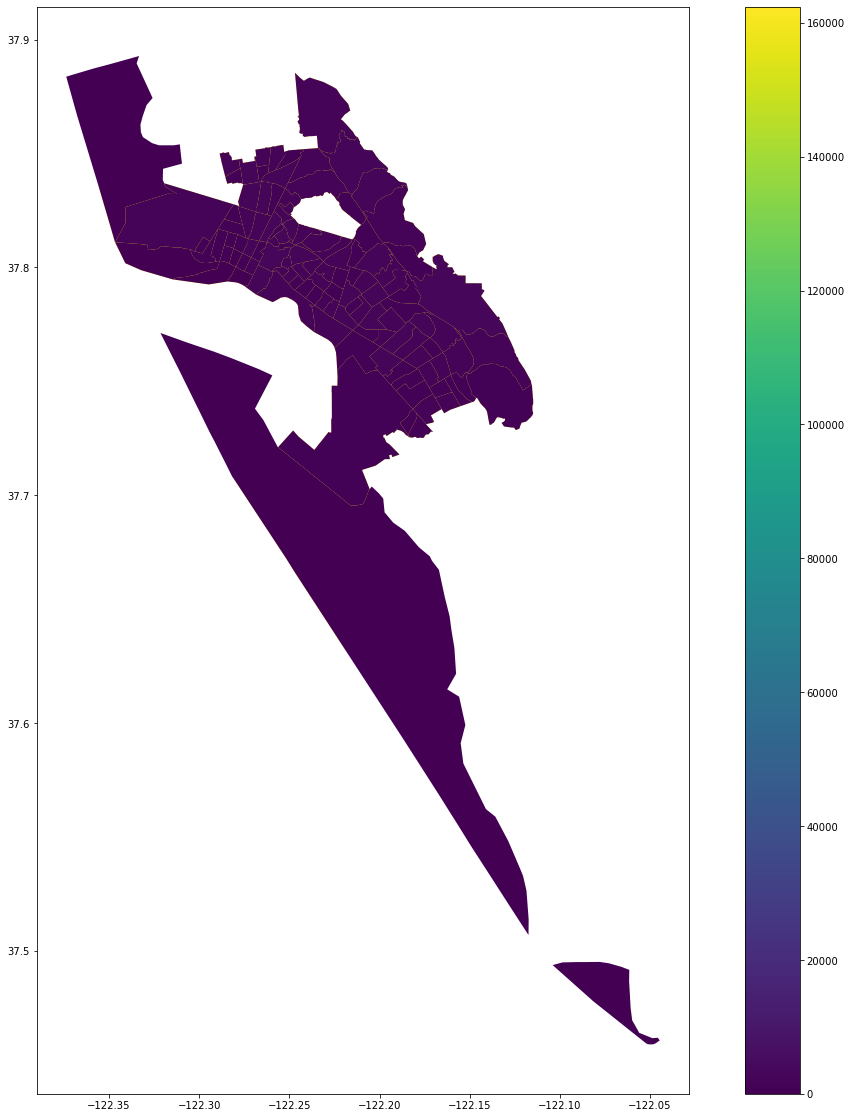

In [22]:
income_sorted.plot(figsize=(20,20), column='Total Households', legend=True)

Everything is below 20k households because the max is more than 160k households. So let me remove that from the dataset

In [23]:
income_sorted = income_sorted.drop([114])

<AxesSubplot:>

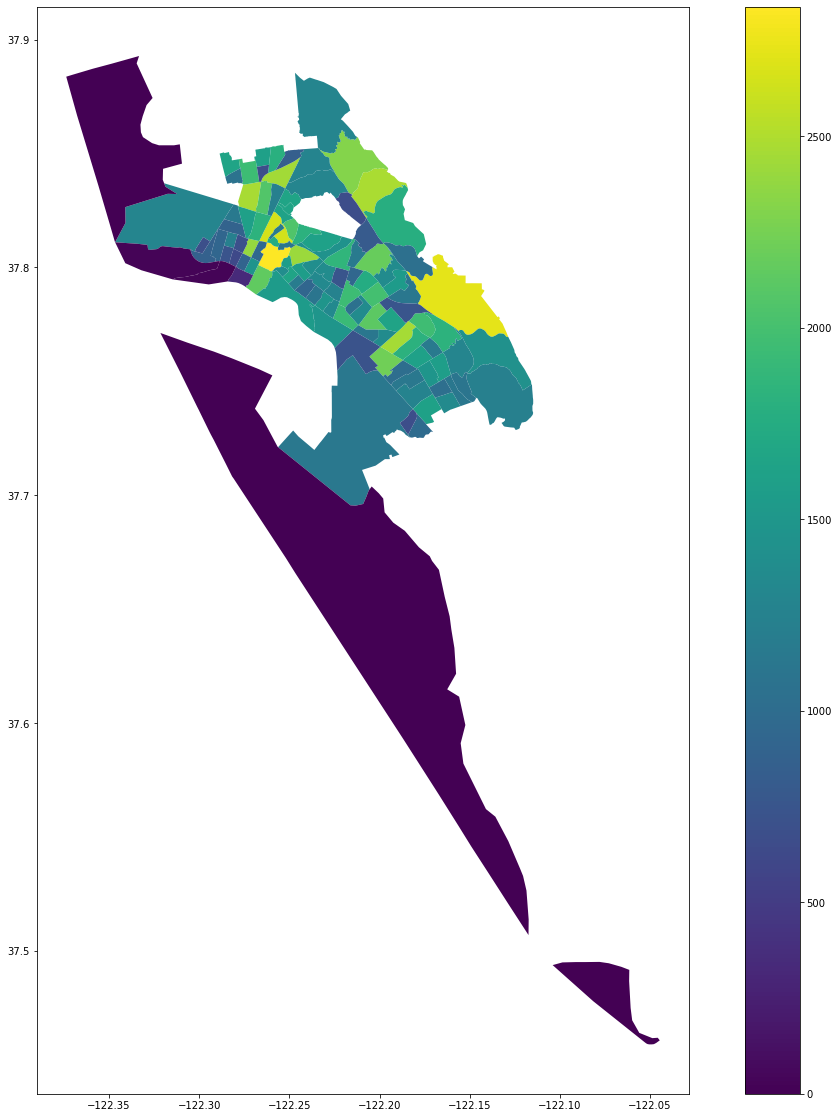

In [24]:
income_sorted.plot(figsize=(20,20), column='Total Households', legend=True)

Yay! That makes more sense, except I also just realized that I have a whole tract with a total household population of 0, so I will also remove that from the set

In [25]:
income_sorted = income_sorted.drop([113])

<AxesSubplot:>

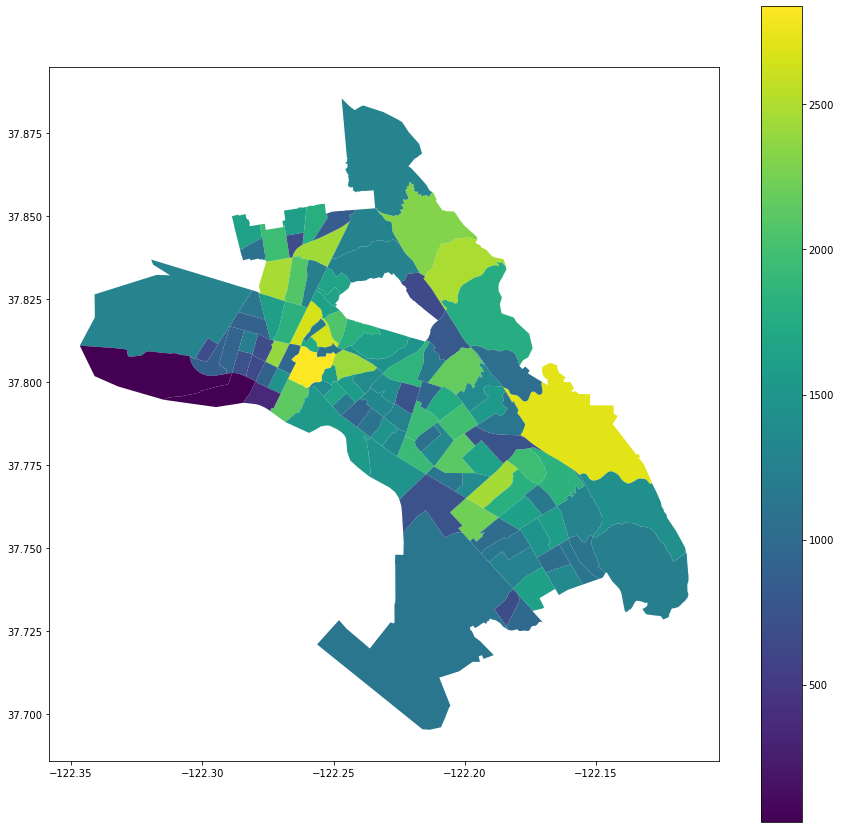

In [26]:
income_sorted.plot(figsize=(15,15), column='Total Households', legend=True)

Okay, that looks like it makes way more sense.

This only tells me the actual number of households in the different tracts, but I'm more interested in finding out the distribution of income. I will put different incomes on a graph and see what distribution makes the most sense to plot

In [27]:
income_sorted.describe()

Total Households  Less than 10,000  10,000 to 14,999  15,000 to 19,999  \
count        113.000000        113.000000        113.000000        113.000000   
mean        1437.336283         82.796460         89.938053         57.327434   
std          560.952580         60.940715         76.854139         48.725075   
min           27.000000          0.000000          0.000000          0.000000   
25%         1100.000000         38.000000         37.000000         22.000000   
50%         1360.000000         74.000000         81.000000         43.000000   
75%         1783.000000        110.000000        115.000000         88.000000   
max         2838.000000        327.000000        527.000000        278.000000   

       20,000 to 24,999  25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  \
count        113.000000        113.000000        113.000000        113.000000   
mean          57.389381         52.955752         56.132743         44.920354   
std           51.004102         38.523506         39.402571         37.873413   
min            0.000000          0.000000          0.000000          0.000000   
25%           21.000000         20.000000         27.000000         15.000000   
50%           44.000000         43.000000         51.000000         37.000000   
75%           83.000000         82.000000         72.000000         69.000000   
max          268.000000        174.000000        220.000000        176.000000   

       40,000 to 44,999  45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  \
count        113.000000        113.000000        113.000000        113.000000   
mean          43.451327         45.407080         86.769912        110.690265   
std           34.855823         38.939889         59.049466         61.738082   
min            0.000000          0.000000          0.000000          0.000000   
25%           20.000000         19.000000         39.000000         71.000000   
50%           37.000000         36.000000         75.000000        107.000000   
75%           59.000000         60.000000        120.000000        146.000000   
max          194.000000        219.000000        300.000000        335.000000   

       75,000 to 99,999  100,000 to 124,999  125,000 to 149,999  \
count        113.000000          113.000000          113.000000   
mean         165.407080          121.858407           93.566372   
std          103.618086           74.480806           63.867312   
min            0.000000            4.000000            0.000000   
25%           96.000000           66.000000           47.000000   
50%          149.000000          111.000000           82.000000   
75%          210.000000          157.000000          129.000000   
max          552.000000          383.000000          347.000000   

       150,000 to 199,999  200,000 or more  
count          113.000000       113.000000  
mean           125.991150       202.734513  
std             94.353675       220.316089  
min              4.000000         0.000000  
25%             50.000000        48.000000  
50%            101.000000       122.000000  
75%            174.000000       281.000000  
max            494.000000      1029.000000

In [28]:
income_sorted.mean()

/tmp/ipykernel_3024/502917553.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  income_sorted.mean()


Total Households      1437.336283
Less than 10,000        82.796460
10,000 to 14,999        89.938053
15,000 to 19,999        57.327434
20,000 to 24,999        57.389381
25,000 to 29,999        52.955752
30,000 to 34,999        56.132743
35,000 to 39,999        44.920354
40,000 to 44,999        43.451327
45,000 to 49,999        45.407080
50,000 to 59,999        86.769912
60,000 to 74,999       110.690265
75,000 to 99,999       165.407080
100,000 to 124,999     121.858407
125,000 to 149,999      93.566372
150,000 to 199,999     125.991150
200,000 or more        202.734513
dtype: float64

I don't really know the best way to go about this because this data isn't really showing me median incomes in each census tract. But I think I will still look at the tracts with the most affluent and most poor households, as well as some in the middle, and maybe that will end up aligning with road condition or 311 response time.

<AxesSubplot:>

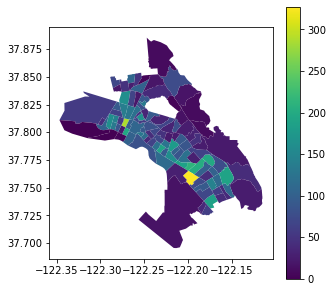

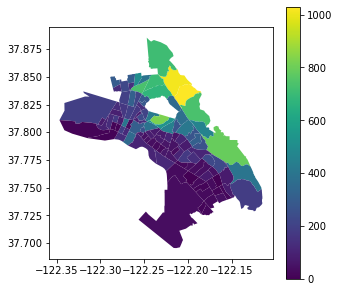

In [29]:
income_sorted.plot(figsize=(5,5), column='Less than 10,000', legend=True)
    
income_sorted.plot(figsize=(5,5), column='200,000 or more', legend=True)

I think these maps are more helpful, even though i am just measuring the extremes of income, I can see that the areas with the most people with the lowest incomes are different from the areas with more people with the highest incomes. I can't be sure whether that means that the average income of each area is distributed the same as the above, but it gives me more insight into which are likely to be poorer or more affluent.

Now I will map a few more of the income columns that are more in the middle, to get a clearer picture of who has slightly below or above average incomes.

<AxesSubplot:>

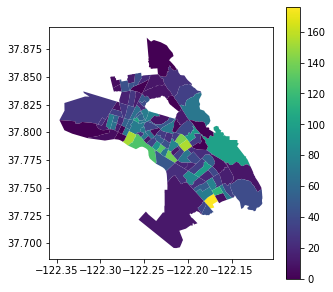

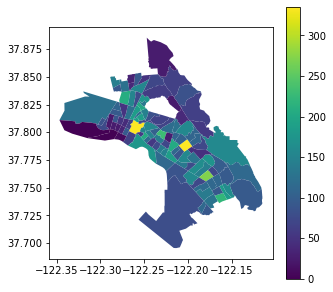

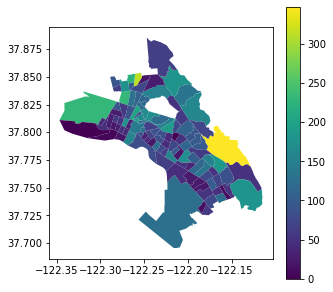

In [30]:
income_sorted.plot(figsize=(5,5), column='35,000 to 39,999', legend=True)  
income_sorted.plot(figsize=(5,5), column='60,000 to 74,999', legend=True)
income_sorted.plot(figsize=(5,5), column='125,000 to 149,999', legend=True)

This is sort of helpful, but it's becoming a little confusing with all the maps so I think I will import some more data and create a map to compare with a couple of the ones I've already made.

In [31]:
oakland_median = gpd.read_file('oakland median income.geojson')
oakland_median

geoid                            name  B19013001  \
0    14000US06001400100  Census Tract 4001, Alameda, CA   219861.0   
1    14000US06001400200  Census Tract 4002, Alameda, CA   188958.0   
2    14000US06001400300  Census Tract 4003, Alameda, CA   114598.0   
3    14000US06001400400  Census Tract 4004, Alameda, CA   130658.0   
4    14000US06001400500  Census Tract 4005, Alameda, CA   115263.0   
..                  ...                             ...        ...   
110  14000US06001981900  Census Tract 9819, Alameda, CA   171563.0   
111  14000US06001982000  Census Tract 9820, Alameda, CA   128750.0   
112  14000US06001983200  Census Tract 9832, Alameda, CA   165909.0   
113  14000US06001990000  Census Tract 9900, Alameda, CA        NaN   
114      16000US0653000                     Oakland, CA    73692.0   

     B19013001, Error                                           geometry  
0             17887.0  MULTIPOLYGON (((-122.24692 37.88544, -122.2466...  
1             20623.0  MULTIPOLYGON (((-122.25792 37.84261, -122.2577...  
2             32735.0  MULTIPOLYGON (((-122.26563 37.83764, -122.2655...  
3              6004.0  MULTIPOLYGON (((-122.26183 37.84162, -122.2618...  
4             17640.0  MULTIPOLYGON (((-122.26951 37.84858, -122.2693...  
..                ...                                                ...  
110           90615.0  MULTIPOLYGON (((-122.34668 37.81103, -122.3441...  
111           50357.0  MULTIPOLYGON (((-122.31439 37.79484, -122.3135...  
112           19991.0  MULTIPOLYGON (((-122.28417 37.79402, -122.2838...  
113               NaN  MULTIPOLYGON (((-122.09859 37.49488, -122.0910...  
114            1555.0  MULTIPOLYGON (((-122.35588 37.83573, -122.3507...  

[115 rows x 5 columns]

I've added simply the median income for every tract in Oakland. Similar to the last data set, I need to remove the rows for the entire city of Oakland and tract 9900.

In [32]:
oakland_median = oakland_median.drop([113,114])

In [33]:
oakland_median.head()

geoid                            name  B19013001  \
0  14000US06001400100  Census Tract 4001, Alameda, CA   219861.0   
1  14000US06001400200  Census Tract 4002, Alameda, CA   188958.0   
2  14000US06001400300  Census Tract 4003, Alameda, CA   114598.0   
3  14000US06001400400  Census Tract 4004, Alameda, CA   130658.0   
4  14000US06001400500  Census Tract 4005, Alameda, CA   115263.0   

   B19013001, Error                                           geometry  
0           17887.0  MULTIPOLYGON (((-122.24692 37.88544, -122.2466...  
1           20623.0  MULTIPOLYGON (((-122.25792 37.84261, -122.2577...  
2           32735.0  MULTIPOLYGON (((-122.26563 37.83764, -122.2655...  
3            6004.0  MULTIPOLYGON (((-122.26183 37.84162, -122.2618...  
4           17640.0  MULTIPOLYGON (((-122.26951 37.84858, -122.2693...

Now I will rename the columns and get rid of the margin of error column.

In [34]:
list(oakland_median)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [35]:
median_to_keep = ['geoid', 'name', 'B19013001', 'geometry']

In [36]:
oakland_median = oakland_median[median_to_keep]
oakland_median

geoid                            name  B19013001  \
0    14000US06001400100  Census Tract 4001, Alameda, CA   219861.0   
1    14000US06001400200  Census Tract 4002, Alameda, CA   188958.0   
2    14000US06001400300  Census Tract 4003, Alameda, CA   114598.0   
3    14000US06001400400  Census Tract 4004, Alameda, CA   130658.0   
4    14000US06001400500  Census Tract 4005, Alameda, CA   115263.0   
..                  ...                             ...        ...   
108  14000US06001410400  Census Tract 4104, Alameda, CA    73996.0   
109  14000US06001410500  Census Tract 4105, Alameda, CA    31151.0   
110  14000US06001981900  Census Tract 9819, Alameda, CA   171563.0   
111  14000US06001982000  Census Tract 9820, Alameda, CA   128750.0   
112  14000US06001983200  Census Tract 9832, Alameda, CA   165909.0   

                                              geometry  
0    MULTIPOLYGON (((-122.24692 37.88544, -122.2466...  
1    MULTIPOLYGON (((-122.25792 37.84261, -122.2577...  
2    MULTIPOLYGON (((-122.26563 37.83764, -122.2655...  
3    MULTIPOLYGON (((-122.26183 37.84162, -122.2618...  
4    MULTIPOLYGON (((-122.26951 37.84858, -122.2693...  
..                                                 ...  
108  MULTIPOLYGON (((-122.16921 37.74276, -122.1691...  
109  MULTIPOLYGON (((-122.29360 37.80530, -122.2935...  
110  MULTIPOLYGON (((-122.34668 37.81103, -122.3441...  
111  MULTIPOLYGON (((-122.31439 37.79484, -122.3135...  
112  MULTIPOLYGON (((-122.28417 37.79402, -122.2838...  

[113 rows x 4 columns]

In [41]:
oakland_median.columns = ['geoid', 'Census Tract', 'Median Income ($)', 'geometry']

In [42]:
oakland_median.head()

geoid                    Census Tract  Median Income ($)  \
0  14000US06001400100  Census Tract 4001, Alameda, CA           219861.0   
1  14000US06001400200  Census Tract 4002, Alameda, CA           188958.0   
2  14000US06001400300  Census Tract 4003, Alameda, CA           114598.0   
3  14000US06001400400  Census Tract 4004, Alameda, CA           130658.0   
4  14000US06001400500  Census Tract 4005, Alameda, CA           115263.0   

                                            geometry  
0  MULTIPOLYGON (((-122.24692 37.88544, -122.2466...  
1  MULTIPOLYGON (((-122.25792 37.84261, -122.2577...  
2  MULTIPOLYGON (((-122.26563 37.83764, -122.2655...  
3  MULTIPOLYGON (((-122.26183 37.84162, -122.2618...  
4  MULTIPOLYGON (((-122.26951 37.84858, -122.2693...

Now I will do the same thing that I've done before, which is sort by descending values.

In [43]:
oakland_median = oakland_median.sort_values(by = 'Median Income ($)', ascending = False)

In [44]:
oakland_median.head()

geoid                       Census Tract  Median Income ($)  \
0   14000US06001400100     Census Tract 4001, Alameda, CA           219861.0   
40  14000US06001404300     Census Tract 4043, Alameda, CA           210882.0   
49  14000US06001405100     Census Tract 4051, Alameda, CA           204412.0   
42  14000US06001404501  Census Tract 4045.01, Alameda, CA           204338.0   
39  14000US06001404200     Census Tract 4042, Alameda, CA           201744.0   

                                             geometry  
0   MULTIPOLYGON (((-122.24692 37.88544, -122.2466...  
40  MULTIPOLYGON (((-122.25081 37.83714, -122.2505...  
49  MULTIPOLYGON (((-122.24329 37.81106, -122.2431...  
42  MULTIPOLYGON (((-122.22446 37.83026, -122.2243...  
39  MULTIPOLYGON (((-122.25241 37.83454, -122.2522...

I wonder what the distribution of median incomes looks like, so I will make a chart that includes all the tracts.

<AxesSubplot:ylabel='Frequency'>

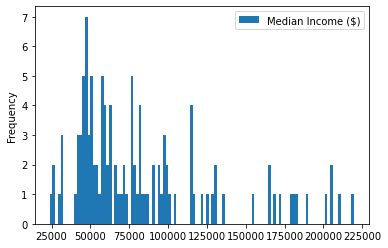

In [45]:
oakland_median.plot.hist(bins=113)

Looks like there are more tracts in Oakland where the median income is around 50k or so. Based on the dataset from before I deleted the Oakland row, the median income for the entire city is close to 74k. So it looks like there are plenty of tracts that are below the median.

Now it's time to plot the median incomes on a map and compare them to our other maps.

<AxesSubplot:>

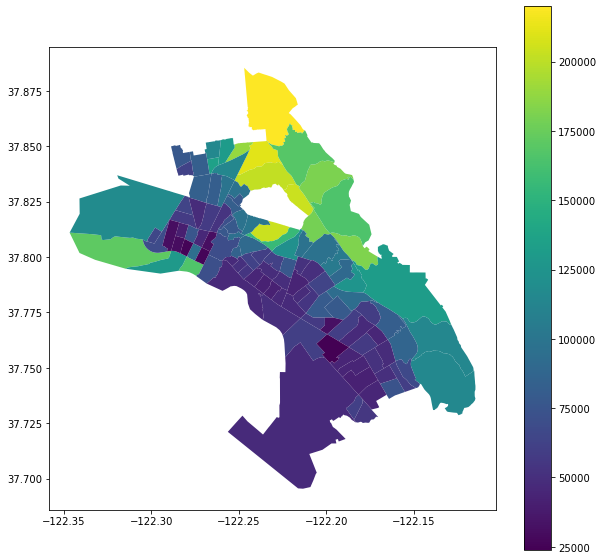

In [46]:
oakland_median.plot(figsize=(10,10), column='Median Income ($)', legend=True)

I think I'll replot this so that the tract medians are distributed in different ways. I will stick to the same color scheme so that it will be easier to compare.

<AxesSubplot:>

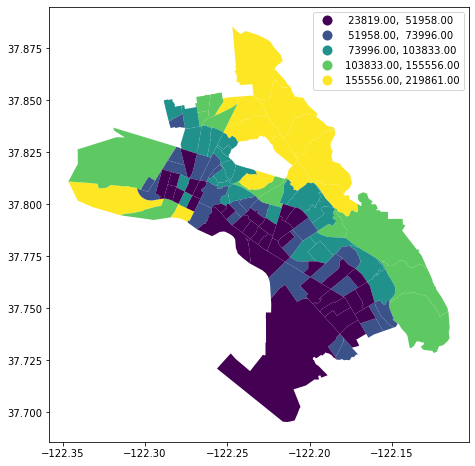

In [47]:
oakland_median.plot(figsize=(10,8),
                 column='Median Income ($)',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

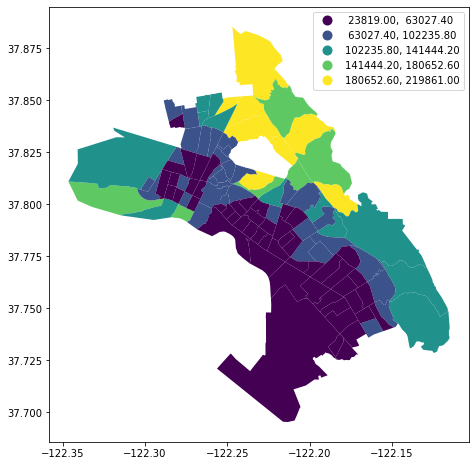

In [48]:
oakland_median.plot(figsize=(10,8),
                 column='Median Income ($)',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

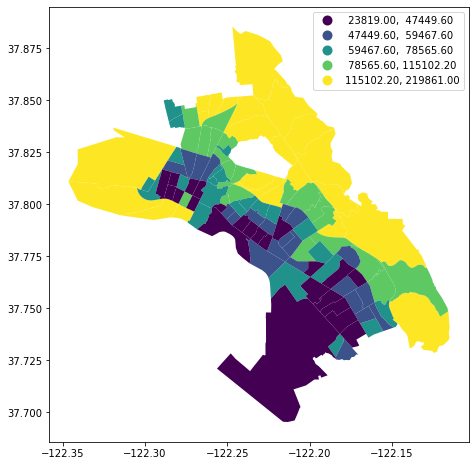

In [49]:
oakland_median.plot(figsize=(10,8),
                 column='Median Income ($)',
                 legend=True, 
                 scheme='quantiles')

I think the quantiles map does the best job of showing more accurate income distributions, especially because the actual median income of the city is around the center of the breaks. So I will compare that one and the map from earlier that contained the city median (60,000 to 74,999).

Text(0.5, 1.0, 'Households in Oakland with Income 60,000 to 74,999')

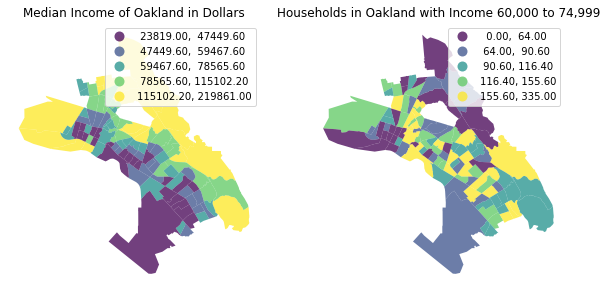

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

ax1, ax2 = axs

oakland_median.plot(column='Median Income ($)', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Median Income of Oakland in Dollars")

income_sorted.plot(column=('60,000 to 74,999'), 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
            )

ax2.axis("off")
ax2.set_title("Households in Oakland with Income 60,000 to 74,999")

My main issue here is with the color schemes, since I'm looking at different messages. The map on the left shows me the quantile distribution of median income in Oakland, whereas the map on the right doesn't necessarily show me that the more affluent areas are concentrated in the yellow and green tracts. Instead, it just shows me that the most homes that make 60k-75k are in the yellow and green tracts. I am trying to figure out the best way to layer my data so that I am getting at the real purpose of the research, which is seeing how road maintenance is handled in different areas depending on socioeconomic demography.

## Adding Base Maps

I am not familiar with the Oakland area, so it would definitely help me understand the surroundings better if I add a base map with landmarks.

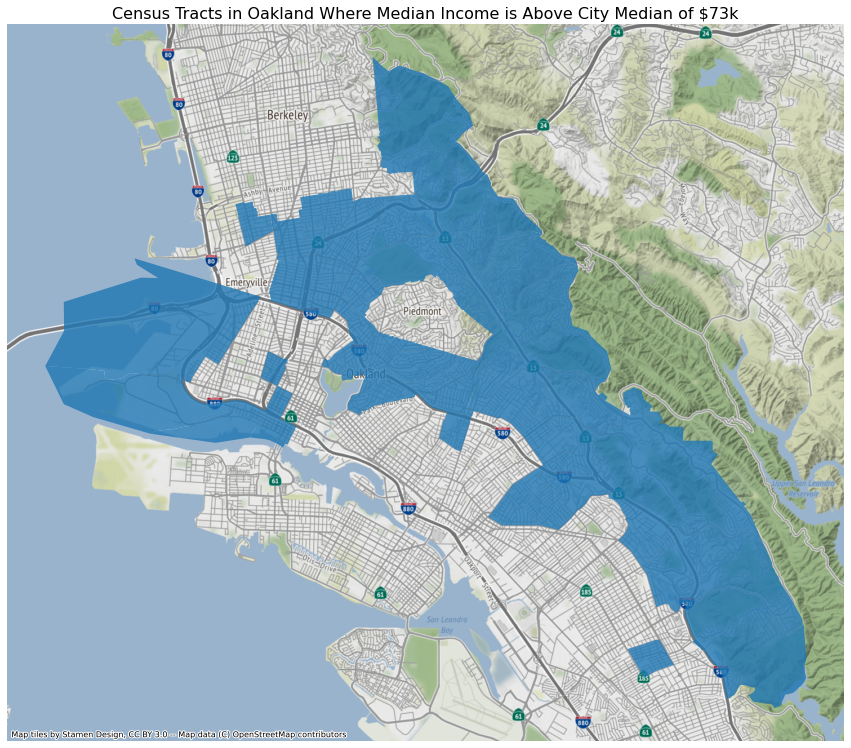

In [66]:
oakland_median_base = oakland_median.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))
oakland_median_base[oakland_median_base['Median Income ($)'] > 73000].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts in Oakland Where Median Income is Above City Median of $73k',fontsize=16)
ctx.add_basemap(ax)

Maybe I'll try the same type of map again but with below the median income and above a much higher income of $150,000.

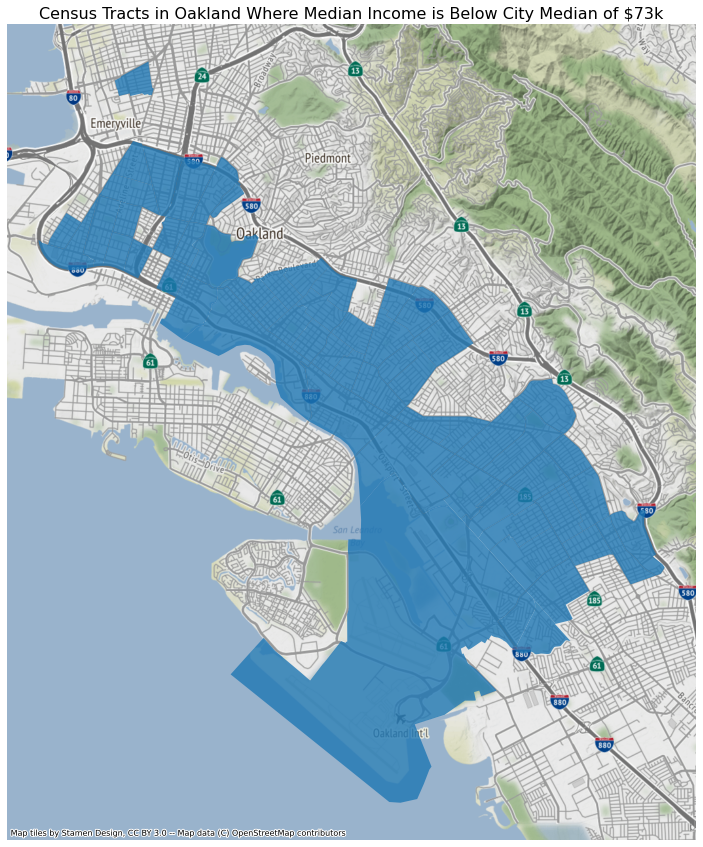

In [67]:
oakland_median_base = oakland_median.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))
oakland_median_base[oakland_median_base['Median Income ($)'] < 73000].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts in Oakland Where Median Income is Below City Median of $73k',fontsize=16)
ctx.add_basemap(ax)

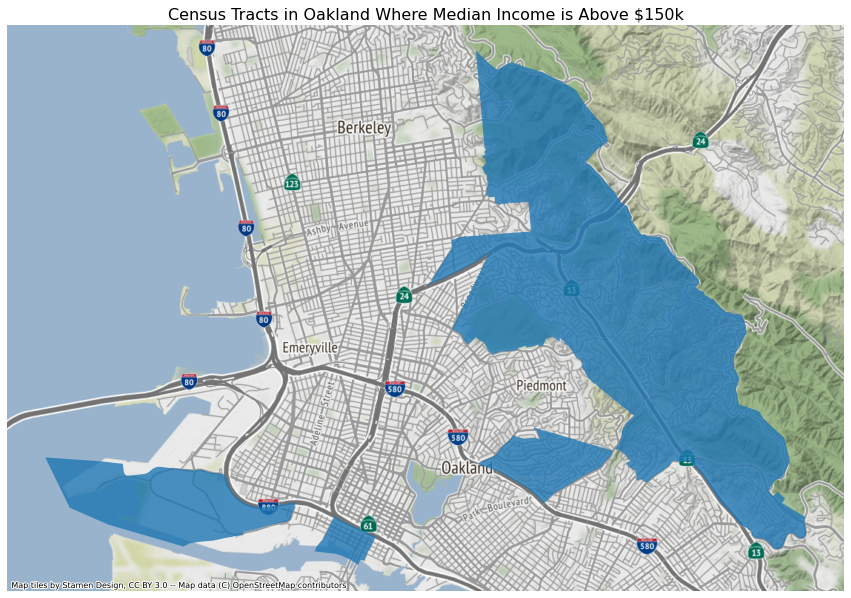

In [68]:
oakland_median_base = oakland_median.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))
oakland_median_base[oakland_median_base['Median Income ($)'] > 150000].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts in Oakland Where Median Income is Above $150k',fontsize=16)
ctx.add_basemap(ax)

I think that the second dataset helped me visualize the generally more and less affluent areas of Oakland, but it didn't have as much data to work with as the first set did. I will be interested to see how this overlaps with Nick's data on race demographics in Oakland and later, when we add layers that look at road condition and 311 request response times.